In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
from matplotlib import pyplot as plt
from datetime import datetime   

In [2]:
#Definicion de funciones

#Extraemos los datos  de Yahoo Finances, por el momento unicamente nos interesa el precio de cierre
def extract_date_yf(etiqueta,start_data,end_data,periocidad):

    df_aux = yf.download(etiqueta,start=start_data,end=end_data, interval = periocidad)
    return pd.DataFrame(df_aux['Close'])


<h1> Extraccion de datos a partir de Yahoo Finances </h1>

In [3]:
#Buscamos datos de SP500 y MELI

#Fechas de inicio y fin
start_data = '2022-01-01'
end_data = str(datetime.now().year) + "-" + str(datetime.now().month) + "-" + str(datetime.now().day)

#Periocidad a rescatar
periocidad = "1d"

#Etiquetas correspondiente al SP500
lista_etiquetas = ["^GSPC","MELI","AAPL","AMZN","KO","GOOG"]

#Dataframe que contendra los datos a recoletar
datos_concatenados = pd.DataFrame()

#Almacenamos todos los datos en un dataframe auxiliar y luego lo pasamos al general
#Esto con el objetivo de un principio estudiar correlaciones, covarianzas, y coseno
for etiqueta in lista_etiquetas:

    df_aux = yf.download(etiqueta,start=start_data,end=end_data, interval = periocidad)
    datos_concatenados[etiqueta] = df_aux['Close']

#Borramos el indice
datos_concatenados = datos_concatenados.reset_index(drop=True)

#Cambiamos el nombre de la primera columna, por uno mas descriptivos
datos_concatenados = datos_concatenados.rename(columns= {"^GSPC":"SP500"})

print(datos_concatenados)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

           SP500         MELI        AAPL        AMZN         KO        GOOG
0    4796.560059  1332.939941  182.009995  170.404495  59.299999  145.074493
1    4793.540039  1241.380005  179.699997  167.522003  60.290001  144.416504
2    4700.580078  1129.689941  174.919998  164.356995  60.790001  137.653503
3    4696.049805  1156.780029  172.000000  163.253998  60.470001  137.550995
4    4677.029785  1085.359985  172.169998  162.554001  60.330002  137.004501
..           ...          ...         ...         ...        ...         ...
509  4783.830078  1658.579956  185.919998  154.619995  60.389999  144.240005
510  4765.979980  1672.670044  183.630005  153.160004  59.990002  144.080002
511  4739.209961  1635.280029  182.679993  151.710007  59.990002  142.889999
512  4780.939941  1661.979980  188.630005  153.500000  60.160000  144.990005
513  4839.810059  1726.189941  191.559998  155.339996  59.830002  147.970001

[514 rows x 6 columns]


<h1> Estudio de Correlaccion y Covarianza </h1>

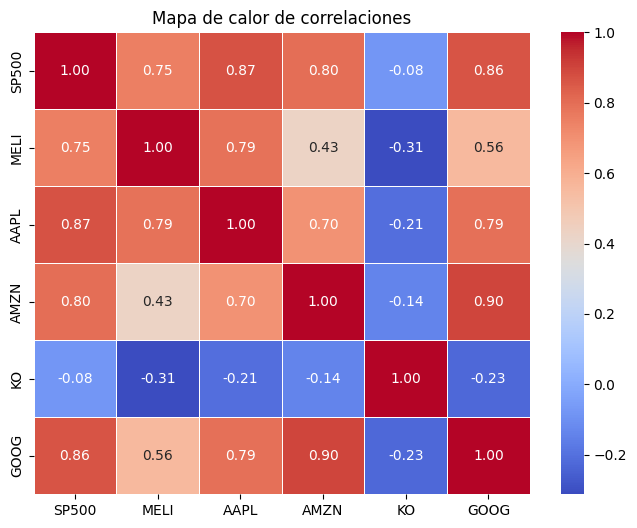

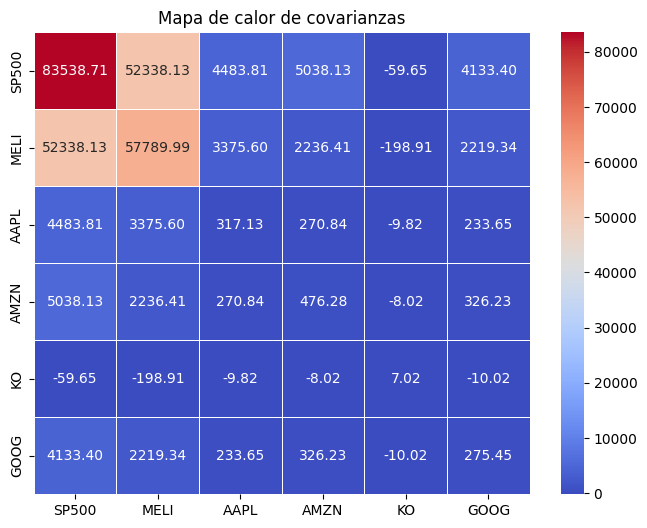

In [4]:
# Calcular la matriz de correlación
correlation_matrix = datos_concatenados.corr(method='pearson')

# Crear un mapa de calor de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de calor de correlaciones')
plt.show()

# Calcular la matriz de covarianza
covarianza_matrix = datos_concatenados.cov()

# Crear un mapa de calor de correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(covarianza_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de calor de covarianzas')
plt.show()

<h1> Similitud del Coseno </h1>

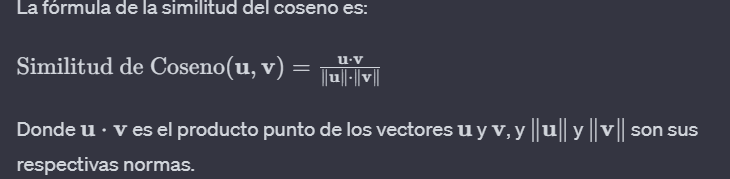


In [5]:
#==== Buscamos conocer la similitud del coseno entre el SP500 y cada accion

#Norma del vector del SP500
norma_sp500 = np.linalg.norm(datos_concatenados['SP500'])

for etiqueta in lista_etiquetas:

    if etiqueta == "^GSPC": #--> Nos salteamos el SP500 ya lo comparariamos consigo mismo
        continue
    else:

        #Calculamos producto punto
        producto_punto = np.dot(datos_concatenados['SP500'],datos_concatenados[etiqueta])

        #Norma del vector a comparar
        norma_etiqueta = np.linalg.norm(datos_concatenados[etiqueta])

        #Calculamos la similitud del coseno: (producto_punto_sp500 * producto_punto_accion) / (norma_sp500 * norma_accion)
        similitud_coseno = producto_punto / (norma_sp500 * norma_etiqueta)
        print(f"La similitud entre el SP500 y {etiqueta}: {similitud_coseno} ")



La similitud entre el SP500 y MELI: 0.9860454818969636 
La similitud entre el SP500 y AAPL: 0.9982748006899342 
La similitud entre el SP500 y AMZN: 0.9921240415379468 
La similitud entre el SP500 y KO: 0.9964736440365513 
La similitud entre el SP500 y GOOG: 0.9961615317426871 


<h1>Proyeccion escalar tomando como vector de referencia al SP500</h1>

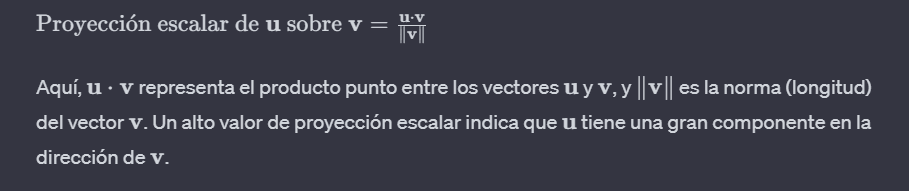

In [6]:

#Vector base a comprar
v = datos_concatenados['SP500']

for columna in datos_concatenados.columns:
        
    proyecciones_escalares = np.dot(datos_concatenados[columna],datos_concatenados['SP500']) / np.linalg.norm(datos_concatenados['SP500'])

    print(f"La proyeccion escalar de {columna} respecto al SP500  es: {proyecciones_escalares}")

La proyeccion escalar de SP500 respecto al SP500  es: 95563.57584367
La proyeccion escalar de MELI respecto al SP500  es: 25421.163224091277
La proyeccion escalar de AAPL respecto al SP500  es: 3738.433296872303
La proyeccion escalar de AMZN respecto al SP500  es: 2841.5695737764927
La proyeccion escalar de KO respecto al SP500  es: 1373.912888306011
La proyeccion escalar de GOOG respecto al SP500  es: 2691.794837770474


<h1> Creacion de medias moviles </h1>

In [7]:
#Obtenemos los datos de la accion y creamos las medias moviles
df_meli = extract_date_yf('MELI',start_data,end_data,periocidad)
df_meli['mv_rapida'] = df_meli['Close'].rolling(12).mean()
df_meli['mv_lenta'] = df_meli['Close'].rolling(20).mean()
print(df_meli)

[*********************100%%**********************]  1 of 1 completed

                  Close    mv_rapida     mv_lenta
Date                                             
2022-01-03  1332.939941          NaN          NaN
2022-01-04  1241.380005          NaN          NaN
2022-01-05  1129.689941          NaN          NaN
2022-01-06  1156.780029          NaN          NaN
2022-01-07  1085.359985          NaN          NaN
...                 ...          ...          ...
2024-01-12  1658.579956  1569.062500  1582.474988
2024-01-16  1672.670044  1575.878337  1585.932990
2024-01-17  1635.280029  1580.351674  1587.387494
2024-01-18  1661.979980  1587.888336  1589.507996
2024-01-19  1726.189941  1604.307495  1594.317993

[514 rows x 3 columns]


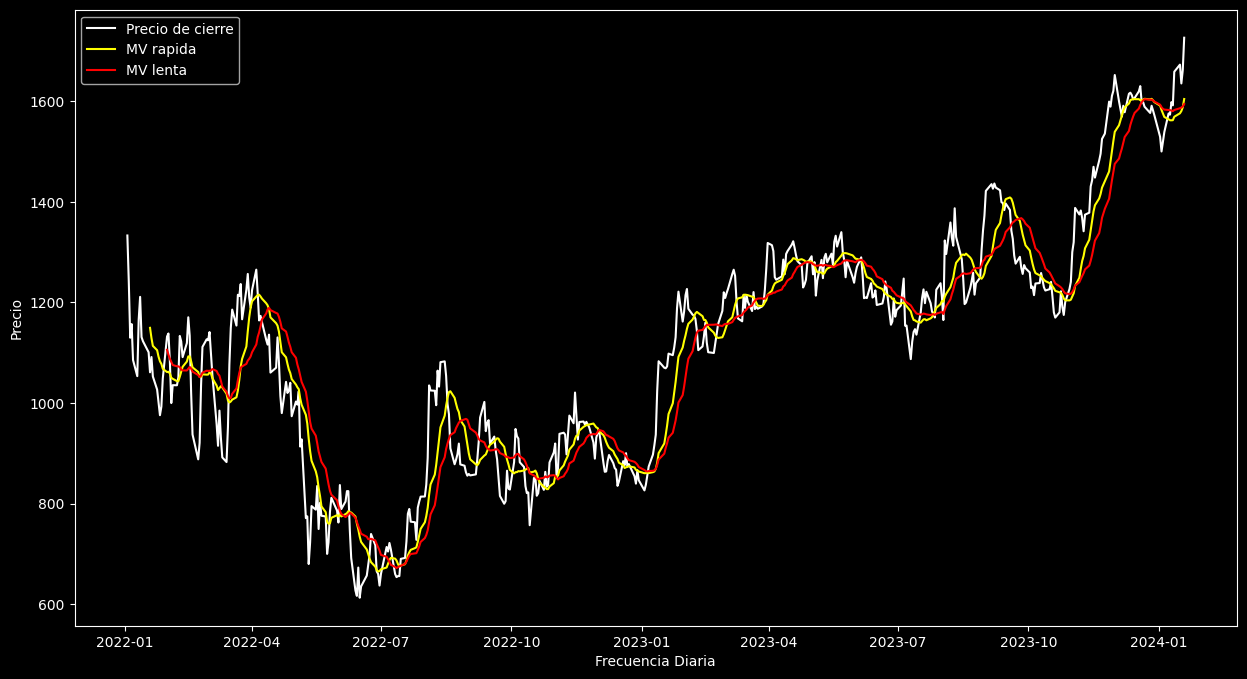

In [8]:
# Configuración del estilo y tamaño
plt.style.use('dark_background')
plt.figure(figsize=(15,8))

#Configuracion de cada linea
plt.plot(df_meli['Close'], color="white", label='Precio de cierre')
plt.plot(df_meli['mv_rapida'], color='yellow', label='MV de 9')
plt.plot(df_meli['mv_lenta'], color='red', label='MV de 18')


plt.legend(['Precio de cierre','MV rapida','MV lenta'])
plt.xlabel("Frecuencia Diaria")
plt.ylabel("Precio")

plt.show()

<h1>Primera estrategia</h1>

<p> La primera estategia consiste en: </p>
<ul>
    <li>
    El cruce de la media movil de 9 con la de 18.
    </li>
</ul>


In [9]:
#Definimos una variable llamada "POSICION" que determina si compramos o vendemos
df_meli['posicion'] = np.nan

df_meli.loc[(df_meli['mv_rapida'] > df_meli['mv_lenta']) , 'posicion' ] = 1
df_meli.loc[(df_meli['mv_rapida'] < df_meli['mv_lenta'])  , 'posicion']  = -1

print(df_meli)

                  Close    mv_rapida     mv_lenta  posicion
Date                                                       
2022-01-03  1332.939941          NaN          NaN       NaN
2022-01-04  1241.380005          NaN          NaN       NaN
2022-01-05  1129.689941          NaN          NaN       NaN
2022-01-06  1156.780029          NaN          NaN       NaN
2022-01-07  1085.359985          NaN          NaN       NaN
...                 ...          ...          ...       ...
2024-01-12  1658.579956  1569.062500  1582.474988      -1.0
2024-01-16  1672.670044  1575.878337  1585.932990      -1.0
2024-01-17  1635.280029  1580.351674  1587.387494      -1.0
2024-01-18  1661.979980  1587.888336  1589.507996      -1.0
2024-01-19  1726.189941  1604.307495  1594.317993       1.0

[514 rows x 4 columns]


Text(0, 0.5, 'Precio')

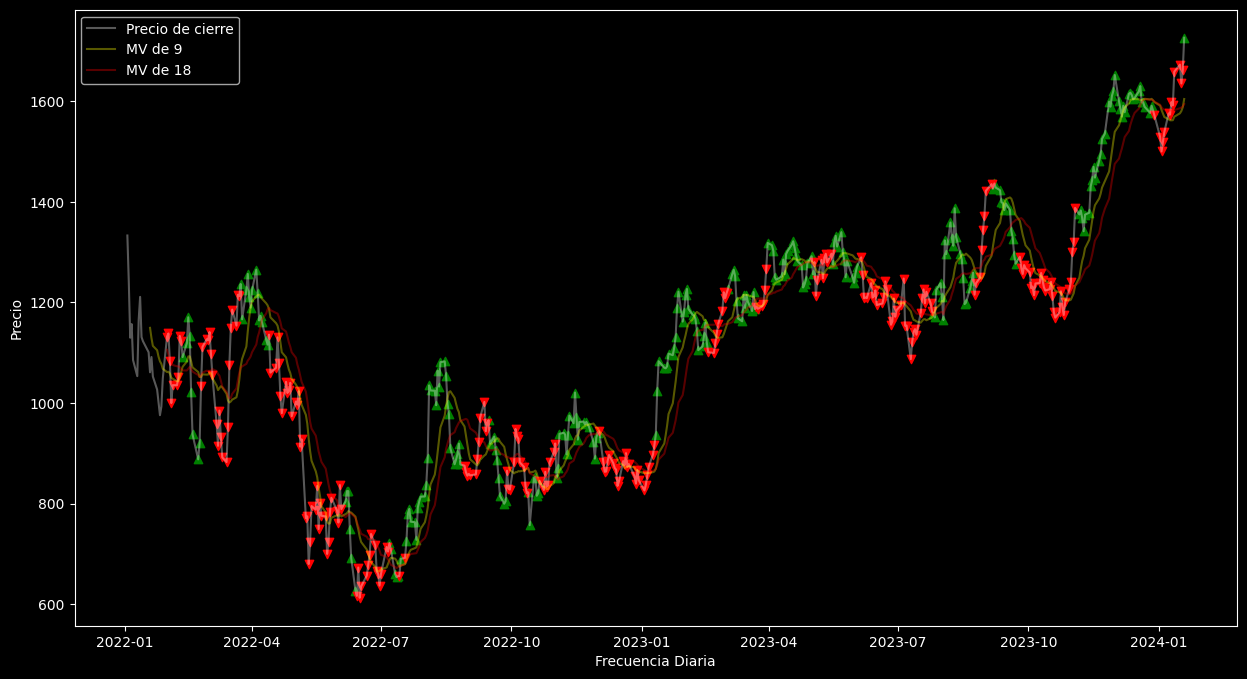

In [10]:
#Lo que se hace aca es obtener los indices de cada posicion que tiene marcado 1 y -1
idx_open = df_meli.loc[df_meli["posicion"] == 1].index
idx_close = df_meli.loc[df_meli["posicion"] == -1].index


# Configuración del estilo y tamaño
plt.style.use('dark_background')
plt.figure(figsize=(15,8))

#Configuracion de lineas punteadas - Como tenemos los indice de los 1 y -1, para buscar la Y usamos loc con el indice y el precio de cierre 
plt.scatter(idx_open, df_meli.loc[idx_open]['Close'], color ="green", marker="^")
plt.scatter(idx_close, df_meli.loc[idx_close]['Close'], color ="red", marker="v")


#Configuracion de cada linea
plt.plot(df_meli['Close'], color="white", label='Precio de cierre' , alpha = 0.35)
plt.plot(df_meli['mv_rapida'], color='yellow', label='MV de 9', alpha = 0.35)
plt.plot(df_meli['mv_lenta'], color='red', label='MV de 18',alpha = 0.35)


plt.legend()
plt.xlabel("Frecuencia Diaria")
plt.ylabel("Precio")

In [26]:
#Porcentaje de variacion
df_meli['pct'] = df_meli['Close'].pct_change()

df_meli['return'] = df_meli['pct'] * df_meli['posicion'].shift(1)


for index, row in df_meli.iterrows():

    print(f"""
        PRECIO DE CIERRE: {row['Close']}
        PORCENTAJE VARIACION: {row['pct']}
        POSICION: {row['posicion']}
        RETORNO: {row['return']}
        """)




        PRECIO DE CIERRE: 1332.93994140625
        PORCENTAJE VARIACION: nan
        POSICION: nan
        RETORNO: nan
        

        PRECIO DE CIERRE: 1241.3800048828125
        PORCENTAJE VARIACION: -0.06869021902580386
        POSICION: nan
        RETORNO: nan
        

        PRECIO DE CIERRE: 1129.68994140625
        PORCENTAJE VARIACION: -0.08997250079527919
        POSICION: nan
        RETORNO: nan
        

        PRECIO DE CIERRE: 1156.780029296875
        PORCENTAJE VARIACION: 0.023980108964148927
        POSICION: nan
        RETORNO: nan
        

        PRECIO DE CIERRE: 1085.3599853515625
        PORCENTAJE VARIACION: -0.061740384633648726
        POSICION: nan
        RETORNO: nan
        

        PRECIO DE CIERRE: 1053.31005859375
        PORCENTAJE VARIACION: -0.02952930565929346
        POSICION: nan
        RETORNO: nan
        

        PRECIO DE CIERRE: 1166.0699462890625
        PORCENTAJE VARIACION: 0.10705289176280686
        POSICION: nan
        RET